In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv(r"C:\Users\pulki\Downloads\train.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df=df.drop('Loan_ID', axis=1)

In [4]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [6]:
df.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [8]:
df.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [10]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [11]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [12]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])

In [13]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [14]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [16]:
df['Loan_Status'].nunique()

2

In [17]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()
for i in ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']:
    df[i]=le.fit_transform(df[i])

In [20]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [21]:
x=df.iloc[:,:-1]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [22]:
y=df['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

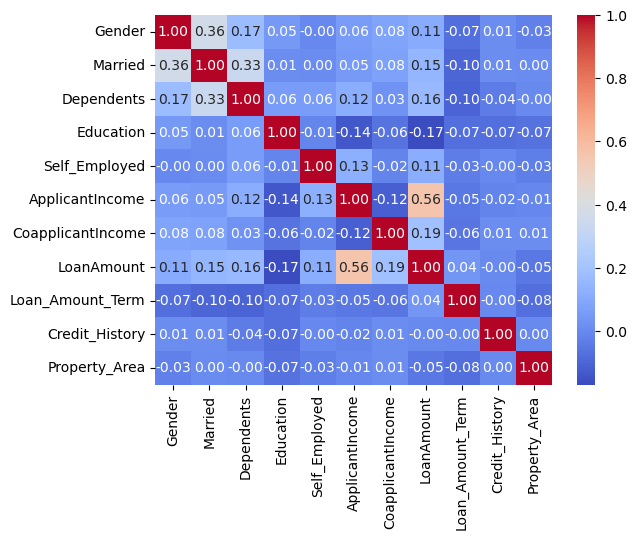

In [23]:
sns.heatmap(x.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
s=SMOTE(random_state=42)
x,y=s.fit_resample(x,y)

C:\Users\pulki\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [26]:
y.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [27]:
y.shape

(844,)

In [28]:
x.shape

(844, 11)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\pulki\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
lr.score(x_test,y_test)*100

69.23076923076923

In [34]:
lr.score(x_train,y_train)*100

75.85185185185185

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
r=RandomForestClassifier()
r.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
r.score(x_test,y_test)*100

79.28994082840237

In [38]:
r.score(x_train,y_train)*100

100.0

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
d=DecisionTreeClassifier()
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
d.score(x_test,y_test)*100

76.92307692307693

In [42]:
d.score(x_train,y_train)*100

100.0

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
k=KNeighborsClassifier()

In [45]:
k.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
k.score(x_test,y_test)*100

65.08875739644971

In [47]:
k.score(x_train,y_train)*100

75.70370370370371

In [48]:
from sklearn.ensemble import VotingClassifier

In [49]:
model=VotingClassifier(estimators=[('rf',r),('dt',d),('knn',k)],voting='soft')
model.fit(x_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [50]:
model.score(x_test,y_test)*100

77.51479289940828

In [51]:
y_pred=model.predict(x_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        94
           1       0.72      0.80      0.76        75

    accuracy                           0.78       169
   macro avg       0.77      0.78      0.77       169
weighted avg       0.78      0.78      0.78       169



In [53]:
y_probs=model.predict_proba(x_test)[:,1]
print(y_probs.shape)

(169,)


In [54]:
from sklearn.metrics import auc,roc_curve

In [55]:
fpr,tpr,threshold=roc_curve(y_test,y_probs)
roc_curve=auc(fpr,tpr)

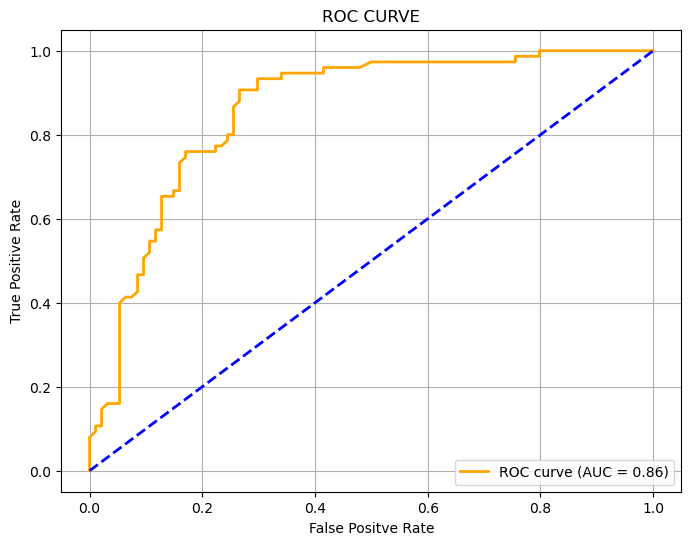

In [56]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='orange',lw=2,label=f'ROC curve (AUC = {roc_curve:.2f})')
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout
plt.show()

In [57]:
!pip install gradio scikit-learn pandas

In [58]:
import joblib

In [59]:
joblib.dump(model,"code_alphacredit2.pkl")
print("Model Saved")

Model Saved


In [60]:
import joblib
model = joblib.load(r"C:\Users\pulki\projects\code_alphacredit2.pkl")

In [62]:
import gradio as gr
import pandas as pd
import joblib
model = joblib.load(r"C:\Users\pulki\projects\code_alphacredit2.pkl")
def predict_credit(
    Gender, Married, Dependents, Education, Self_Employed,
    ApplicantIncome, CoapplicantIncome, LoanAmount,
    Loan_Amount_Term_Years, Credit_History, Property_Area
):
    # Convert loan term from years to months
    loan_term_months = Loan_Amount_Term_Years * 12

    input_data = {
        'Gender': Gender,
        'Married': Married,
        'Dependents': Dependents,
        'Education': Education,
        'Self_Employed': Self_Employed,
        'ApplicantIncome': ApplicantIncome,
        'CoapplicantIncome': CoapplicantIncome,
        'LoanAmount': LoanAmount,
        'Loan_Amount_Term': loan_term_months,
        'Credit_History': Credit_History,
        'Property_Area': Property_Area
    }
    
    df = pd.DataFrame([input_data])
    prediction = model.predict(df)[0]
    return "Loan Approved" if prediction == 1 else "Loan Rejected"

# Interface
gr.Interface(
    fn=predict_credit,
    inputs=[
        gr.Number(label="Gender (0=Female, 1=Male)"),
        gr.Number(label="Married (0=No, 1=Yes)"),
        gr.Number(label="Dependents (0, 1, 2, 3)"),
        gr.Number(label="Education (0=Not Graduate, 1=Graduate)"),
        gr.Number(label="Self Employed (0=No, 1=Yes)"),
        gr.Number(label="Applicant Income"),
        gr.Number(label="Coapplicant Income"),
        gr.Number(label="Loan Amount"),
        gr.Number(label="Loan Term (in years)"),  # User-friendly label
        gr.Number(label="Credit History (0.0 or 1.0)"),
        gr.Number(label="Property Area (0=Rural, 1=Semiurban, 2=Urban)")
    ],
    outputs="text",
    title="Credit Worthiness  Predictor",
    description="Enter applicant details (label encoded) to predict loan approval status. Loan term is in years and will be converted to months."
).launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
